# Part d) Testing different activation functions and depths of the neural network

You should also test different activation functions for the hidden layers. Try out the Sigmoid, the RELU and the Leaky RELU functions and discuss your results. Test your results as functions of the number of hidden layers and nodes. Do you see signs of overfitting? It is optional in this project to perform a bias-variance trade-off analysis.

In [1]:
import sys, os

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

import matplotlib.style as mplstyle

mplstyle.use(["ggplot", "fast"])

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 12,
})

funcs = '/Users/kjesta/Desktop/Masteremner/FYS-STK4155/Project_2_FYSSTK/Code'
sys.path.append(os.path.abspath(funcs))

from functions import *

%load_ext autoreload
%autoreload 2

np.random.seed(42)

In [2]:
def mse(predict, target):
    return np.mean((predict - target) ** 2)

def mse_der(predict, target):
    target = np.array(target).reshape(predict.shape)
    return 2 * (predict - target) / target.size

In [3]:
n = 1000
x = np.linspace(-1, 1, n)
x = x.reshape(-1, 1)

y = runge_function(x) + np.random.normal(0, 0.1, (n,1))

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
X_train_norm = (X_train - X_mean) / X_std
X_test_norm  = (X_test - X_mean) / X_std

In [4]:
hidden_layers_options = [[5], [5, 5], [5, 5, 5], [5, 5, 5, 5], [5, 5, 5, 5, 5]]  # different numbers of hidden layers and nodes
activation_options = [sigmoid, RELU, LRELU]  # different activation functions for hidden layers

In [5]:
results = []

for layers in hidden_layers_options:
    for activate in activation_options:
        print(f"Training NN with layers {layers} and activation {activate.__name__}...")

        activation_funcs = [activate]*len(layers) + [identity]        # hidden + output
        activation_ders  = [derivate(activate) for _ in layers] + [derivate(identity)]

        # Initialize network
        nn = NeuralNetwork(
            network_input_size=X_train.shape[1],
            layer_output_sizes=layers + [1],
            activation_funcs=activation_funcs,
            activation_ders=activation_ders,
            cost_fun=mse,
            cost_der=mse_der
        )
        
        # Train network
        nn.train_SGD(X_train, y_train, epochs=1000, learning_rate=0.1)

        y_pred_test = nn._feed_forward(X_test)
        y_pred_train = nn._feed_forward(X_train)
        
        # Compute errors
        train_err = mse(y_pred_train, y_train)
        test_err  = mse(y_pred_test, y_test)
        
        results.append({
            "layers": layers,
            "activation": activate.__name__,
            "y_pred_test": y_pred_test,
            "y_pred_train": y_pred_train,
            "train_error": train_err,
            "test_error": test_err
        })

df = pd.DataFrame(results)
df

Training NN with layers [5] and activation sigmoid...
Training NN with layers [5] and activation RELU...
Training NN with layers [5] and activation LRELU...
Training NN with layers [5, 5] and activation sigmoid...
Training NN with layers [5, 5] and activation RELU...
Training NN with layers [5, 5] and activation LRELU...
Training NN with layers [5, 5, 5] and activation sigmoid...
Training NN with layers [5, 5, 5] and activation RELU...
Training NN with layers [5, 5, 5] and activation LRELU...
Training NN with layers [5, 5, 5, 5] and activation sigmoid...
Training NN with layers [5, 5, 5, 5] and activation RELU...
Training NN with layers [5, 5, 5, 5] and activation LRELU...
Training NN with layers [5, 5, 5, 5, 5] and activation sigmoid...
Training NN with layers [5, 5, 5, 5, 5] and activation RELU...
Training NN with layers [5, 5, 5, 5, 5] and activation LRELU...


,layers,activation,y_pred_test,y_pred_train,train_error,test_error
0,[5],sigmoid,"[[0.6994633576284597], [0.2209684294927742], [...","[[-0.04743978986902572], [0.6871678605836982],...",0.020162,0.020190
1,[5],RELU,"[[0.2708146622502069], [0.26941878879804904], ...","[[0.2739941517801222], [0.27072418897090045], ...",0.089361,0.082082
2,[5],LRELU,"[[0.6681536375318065], [0.2992373686164862], [...","[[-0.09509274832206333], [0.6442423978798877],...",0.026792,0.026543
3,"[5, 5]",sigmoid,"[[0.7259368264049249], [0.23201407570827481], ...","[[0.047561732080109415], [0.7152051922288232],...",0.017408,0.017253
4,"[5, 5]",RELU,"[[0.8961774000618523], [0.15522059999720716], ...","[[0.032019615896530795], [0.8281263517588122],...",0.009694,0.010149
5,"[5, 5]",LRELU,"[[0.9072140690077026], [0.13515040199947026], ...","[[0.03129290477153612], [0.8381481191413147], ...",0.009868,0.010495
6,"[5, 5, 5]",sigmoid,"[[0.2679180849688223], [0.28274694877667417], ...","[[0.20460148607324646], [0.2691421447424317], ...",0.087520,0.080280
7,"[5, 5, 5]",RELU,"[[0.8934429964812718], [0.1134940207439531], [...","[[0.035562927084524465], [0.8316234746281166],...",0.010040,0.010399
8,"[5, 5, 5]",LRELU,"[[0.9124613685229609], [0.14027561602617722], ...","[[0.002047932502095118], [0.8415880361004064],...",0.009751,0.010337
9,"[5, 5, 5, 5]",sigmoid,"[[0.25632446140850196], [0.25791610614516536],...","[[0.25147750993368645], [0.2564404500422469], ...",0.089675,0.082059


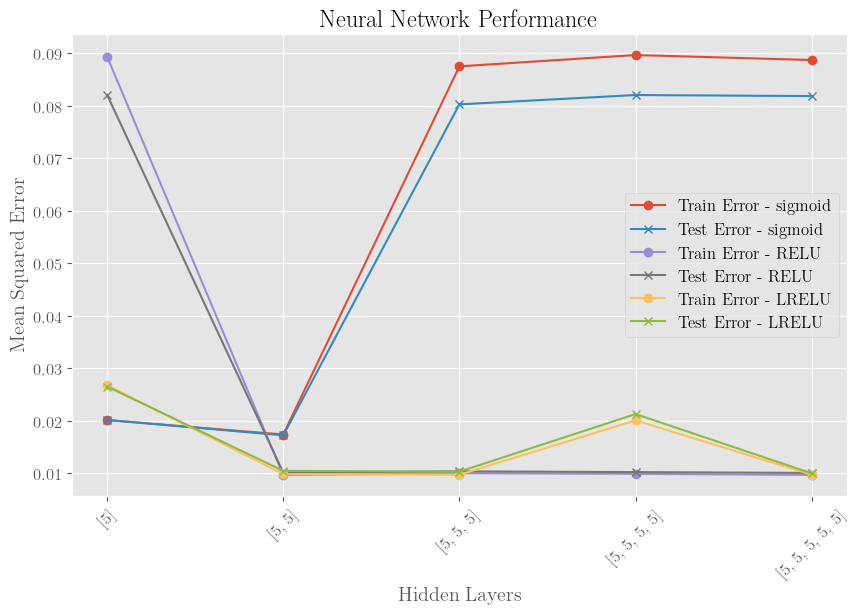

In [6]:
fig, ax = plt.subplots(figsize=(10,6))

for activate in df['activation'].unique():
    subset = df[df['activation'] == activate]
    ax.plot(subset['layers'].astype(str), subset['train_error'], marker='o', label=f'Train Error - {activate}')
    ax.plot(subset['layers'].astype(str), subset['test_error'], marker='x', label=f'Test Error - {activate}')

ax.set_xlabel("Hidden Layers")
ax.set_ylabel("Mean Squared Error")
ax.set_title("Neural Network Performance")
ax.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Diskutere de ulike aktiveringsfunksjonene, hvorfor/hvorfor ikke funker de bra? You know..

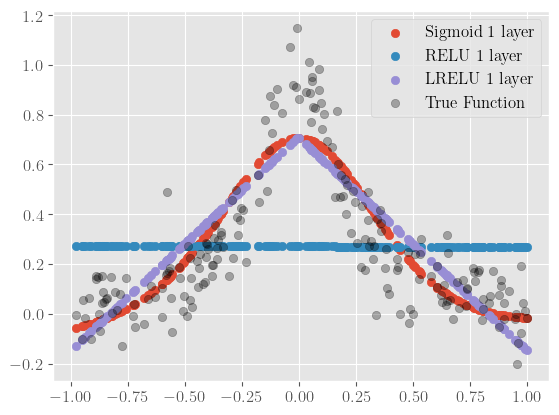

In [34]:
plt.scatter(X_test, df['y_pred_test'][0], label='Sigmoid 1 layer')
plt.scatter(X_test, df['y_pred_test'][1], label='RELU 1 layer')
plt.scatter(X_test, df['y_pred_test'][2], label='LRELU 1 layer')
plt.scatter(X_test, y_test, label='True Function', color='black', alpha=0.3)

plt.legend()

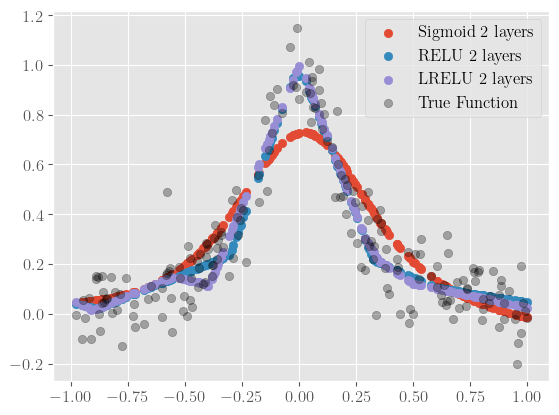

In [35]:
plt.scatter(X_test, df['y_pred_test'][3], label='Sigmoid 2 layers')
plt.scatter(X_test, df['y_pred_test'][4], label='RELU 2 layers')
plt.scatter(X_test, df['y_pred_test'][5], label='LRELU 2 layers')
plt.scatter(X_test, y_test, label='True Function', color='black', alpha=0.3)
plt.legend()

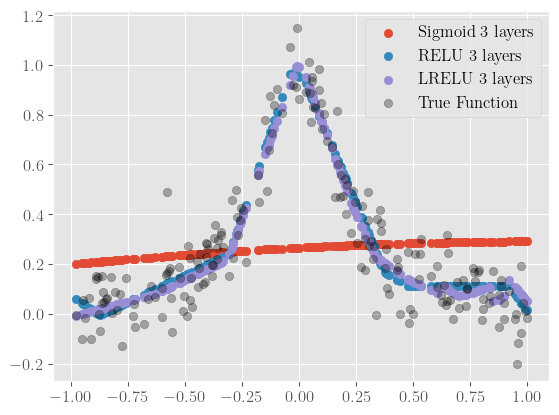

In [36]:
plt.scatter(X_test, df['y_pred_test'][6], label='Sigmoid 3 layers')
plt.scatter(X_test, df['y_pred_test'][7], label='RELU 3 layers')
plt.scatter(X_test, df['y_pred_test'][8], label='LRELU 3 layers')
plt.scatter(X_test, y_test, label='True Function', color='black', alpha=0.3)
plt.legend()

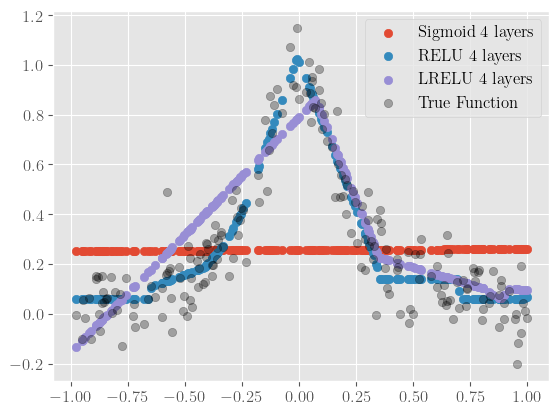

In [37]:
plt.scatter(X_test, df['y_pred_test'][9], label='Sigmoid 4 layers')
plt.scatter(X_test, df['y_pred_test'][10], label='RELU 4 layers')
plt.scatter(X_test, df['y_pred_test'][11], label='LRELU 4 layers')
plt.scatter(X_test, y_test, label='True Function', color='black', alpha=0.3)
plt.legend()

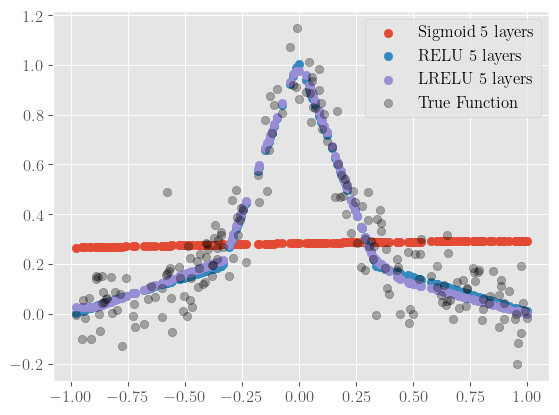

In [38]:
plt.scatter(X_test, df['y_pred_test'][12], label='Sigmoid 5 layers')
plt.scatter(X_test, df['y_pred_test'][13], label='RELU 5 layers')
plt.scatter(X_test, df['y_pred_test'][14], label='LRELU 5 layers')
plt.scatter(X_test, y_test, label='True Function', color='black', alpha=0.3)
plt.legend()